<CENTER style="color:#4d0019;"><h1>Exploring Weather Trends </h1>
    <h3> Project 1 - Ghadah Alabduljabbar</h3></CENTER>




### <p style="color:#3366ff;">What tools did you use for each step? (Python, SQL, Excel, etc)</p> <p>For the database I used SQL, and for the Data analysis and visualization I used Python in Jupyter Notebook.</p>

<br>

##  <center style="color:#b30000;">  Extract the data </center>
### SQL Queries:

In [ ]:

SELECT DISTINCT(country) FROM city_list

SELECT * FROM city_data WHERE city = 'Riyadh'
SELECT * FROM city_data WHERE city = 'Tokyo'
SELECT * FROM city_data WHERE city = 'Washington'

SELECT * FROM global_data



## <center style="color:#b30000;"> Open up the CSV files </center>

In [1]:
import pandas as pd
global_data = pd.read_csv('Global.csv')
global_data

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [2]:
riyadh_data = pd.read_csv('Riyadh_data.csv')
riyadh_data = riyadh_data.loc[:, ['year', 'avg_temp']]
riyadh_data

,year,avg_temp
0,1843,24.74
1,1844,15.45
2,1845,20.82
3,1846,NaN
4,1847,NaN
...,...,...
166,2009,26.71
167,2010,27.37
168,2011,26.40
169,2012,26.83


##  <center style="color:#b30000;"> Create a line chart </center>
### <p style="color:#3366ff;">• How did you calculate the moving average?</p> <p>I used Simple Moving Average (SMA), in which I calculated the mean of a pre-specified number of years divided by that number. I tried 7, 10, and 20 years moving average. As follow where n is 7, 10, and 20. <br><br> To apply this in Python I used <code>rolling</code> function in <code>pandas</code> to specify the number of years to be selected for calculating the mean (Which is 7, 10, and 20), after that I calculated the mean.






### <p style="color:#3366ff;">• What were your key considerations when deciding how to visualize the trends?</p> <p> - I notice there are some missing values in the average temperature data in Riyadh, and since it’s only 2 missing values I decide to use Mean Imputation which is replacing the missing values with the average temperature mean of Riyadh. <br><br> - I notice the time frame is different between the global and local (Riyadh) average temperature data. The global data covers the years from 1750 to 2015, while Riyadh data from 1843 to 2013. Therefore, for the analysis and visualization of the data I select the same time frame for both data which is from 1843 to 2013. </p>


In [3]:
global_data.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [4]:
riyadh_data.isnull().sum()

year        0
avg_temp    2
dtype: int64

In [5]:
riyadh_data['avg_temp'].fillna(round(riyadh_data['avg_temp'].mean(), 1), inplace=True)
riyadh_data.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [6]:
global_data = global_data.loc[(global_data['year'] >= 1843) & (global_data['year'] <= 2013)].copy()
global_data

,year,avg_temp
93,1843,8.17
94,1844,7.65
95,1845,7.85
96,1846,8.55
97,1847,8.09
...,...,...
259,2009,9.51
260,2010,9.70
261,2011,9.52
262,2012,9.51


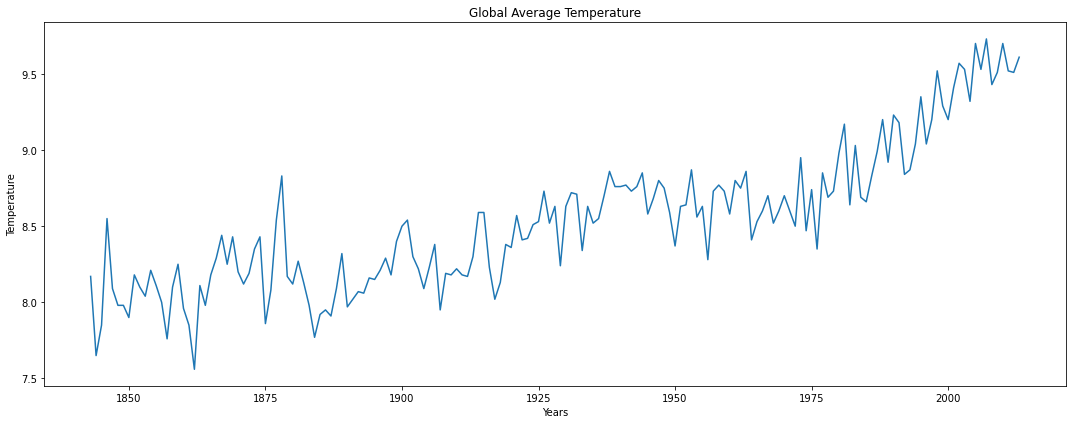

In [22]:
import matplotlib.pyplot as plt
plt.plot(global_data.year, global_data.avg_temp)
plt.title('Global Average Temperature')
plt.rcParams["figure.figsize"] = (15,4)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

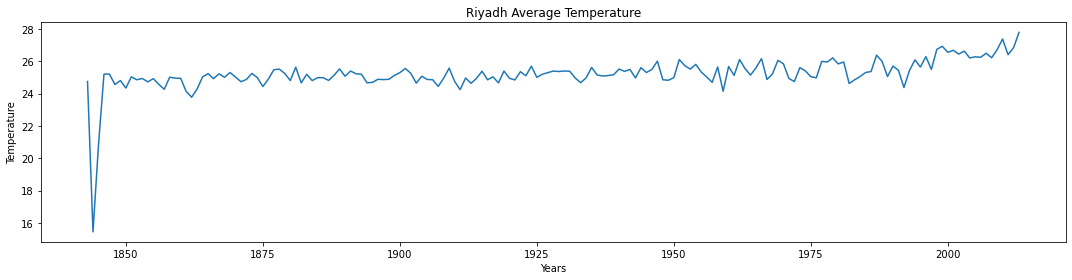

In [8]:
plt.plot(riyadh_data.year, riyadh_data.avg_temp)
plt.title('Riyadh Average Temperature')
plt.rcParams["figure.figsize"] = (15,4)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

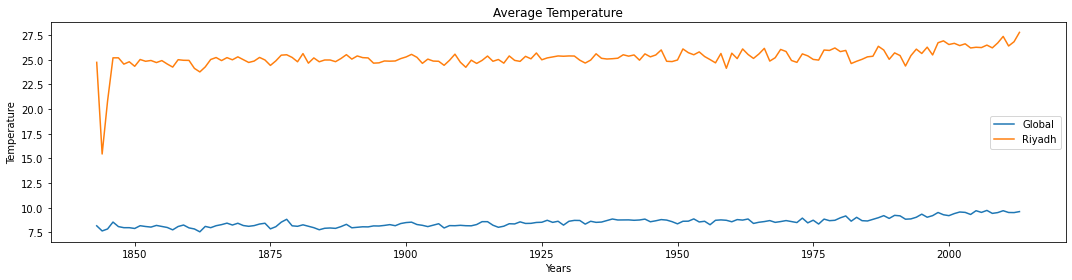

In [9]:
plt.plot(global_data.year, global_data.avg_temp, label = "Global")
plt.plot(riyadh_data.year, riyadh_data.avg_temp, label = "Riyadh")
plt.title('Average Temperature')
plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.tight_layout()
plt.legend()
plt.show()

##  <center style="color:#b30000;"> Calculating Moving Average </center>

In [10]:
# 7 years Movinng Average
global_data['SMA_7'] = global_data.avg_temp.rolling(7, min_periods=1).mean()
riyadh_data['SMA_7'] = riyadh_data.avg_temp.rolling(7, min_periods=1).mean()

# 10 years Movinng Average
global_data['SMA_10'] = global_data.avg_temp.rolling(10, min_periods=1).mean()
riyadh_data['SMA_10'] = riyadh_data.avg_temp.rolling(10, min_periods=1).mean()

# 20 years Movinng Average
global_data['SMA_20'] = global_data.avg_temp.rolling(20, min_periods=1).mean()
riyadh_data['SMA_20'] = riyadh_data.avg_temp.rolling(20, min_periods=1).mean()

In [11]:
global_data

,year,avg_temp,SMA_7,SMA_10,SMA_20
93,1843,8.17,8.170000,8.170,8.1700
94,1844,7.65,7.910000,7.910,7.9100
95,1845,7.85,7.890000,7.890,7.8900
96,1846,8.55,8.055000,8.055,8.0550
97,1847,8.09,8.062000,8.062,8.0620
...,...,...,...,...,...
259,2009,9.51,9.535714,9.493,9.3245
260,2010,9.70,9.560000,9.543,9.3480
261,2011,9.52,9.588571,9.554,9.3650
262,2012,9.51,9.561429,9.548,9.3985


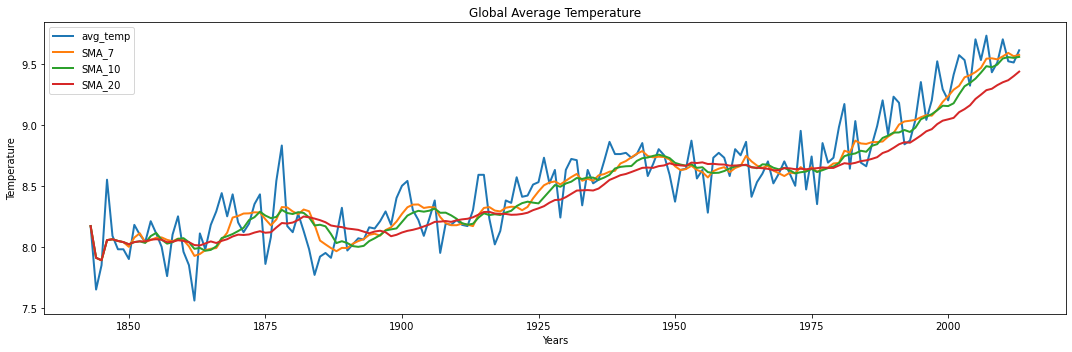

In [12]:
global_data.set_index('year').plot(linewidth=2);
plt.title('Global Average Temperature')
plt.rcParams["figure.figsize"] = (15,6)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

In [13]:
riyadh_data

,year,avg_temp,SMA_7,SMA_10,SMA_20
0,1843,24.74,24.740000,24.740000,24.740000
1,1844,15.45,20.095000,20.095000,20.095000
2,1845,20.82,20.336667,20.336667,20.336667
3,1846,25.20,21.552500,21.552500,21.552500
4,1847,25.20,22.282000,22.282000,22.282000
...,...,...,...,...,...
166,2009,26.71,26.391429,26.440000,26.123000
167,2010,27.37,26.498571,26.522000,26.206500
168,2011,26.40,26.527143,26.495000,26.255000
169,2012,26.83,26.607143,26.534000,26.378000


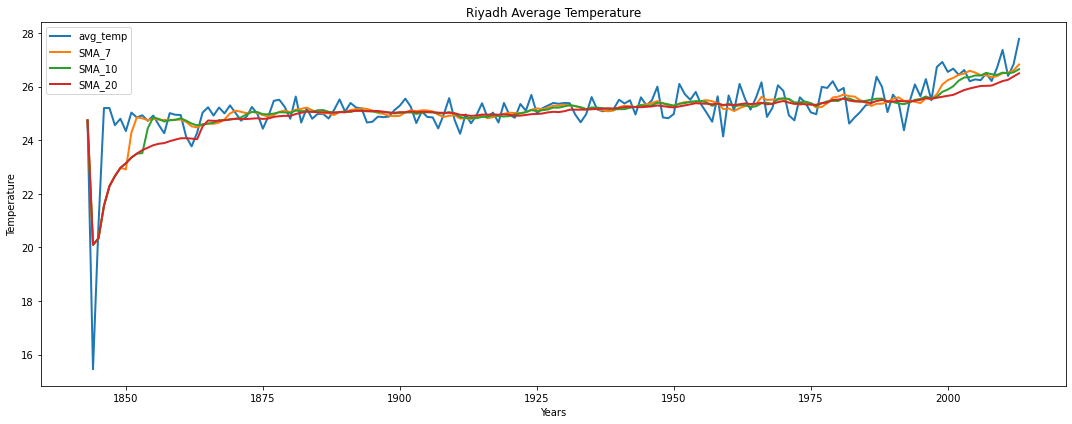

In [14]:
riyadh_data.set_index('year').plot(linewidth=2);
plt.title('Riyadh Average Temperature')
plt.rcParams["figure.figsize"] = (15,6)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

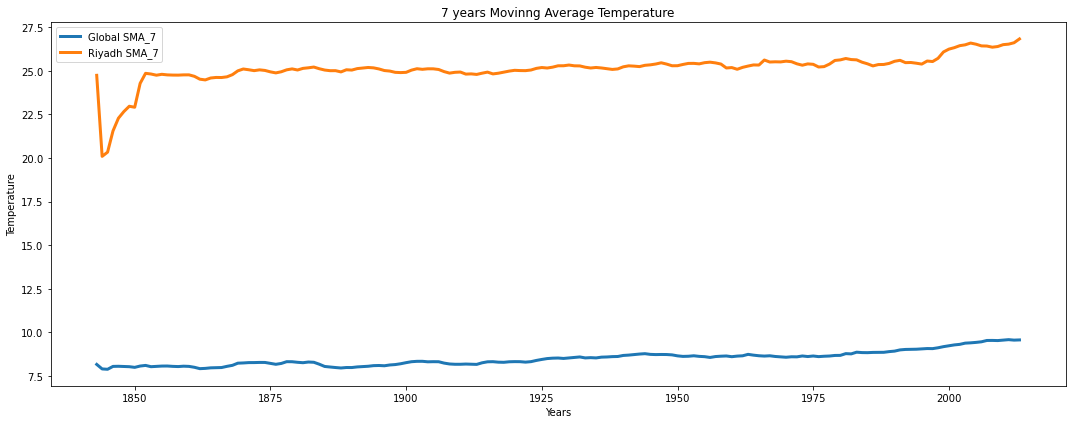

In [15]:
plt.plot(global_data.year, global_data.SMA_7, label = "Global SMA_7", linewidth=3)
plt.plot(riyadh_data.year, riyadh_data.SMA_7, label = "Riyadh SMA_7" , linewidth=3)
plt.title('7 years Movinng Average Temperature')
plt.rcParams["figure.figsize"] = (15,6)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.tight_layout()
plt.legend()
plt.show()

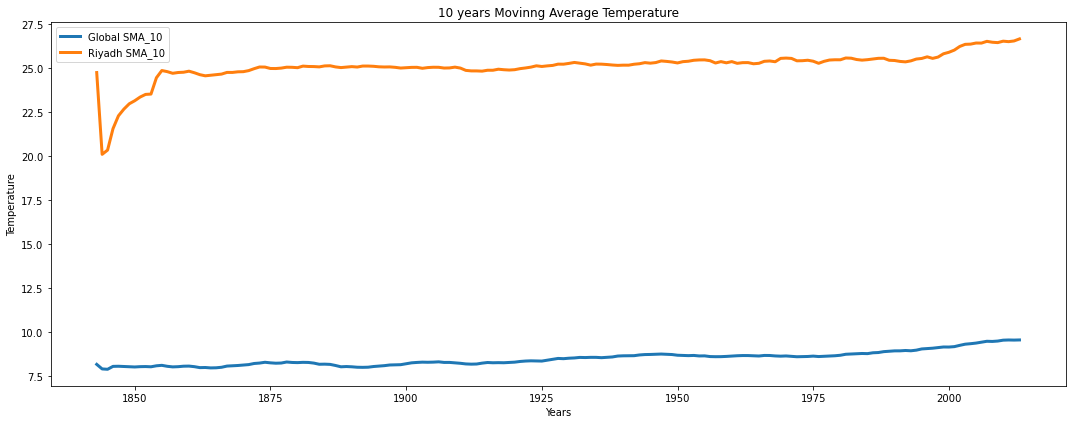

In [16]:
plt.plot(global_data.year, global_data.SMA_10, label = "Global SMA_10", linewidth=3)
plt.plot(riyadh_data.year, riyadh_data.SMA_10, label = "Riyadh SMA_10" , linewidth=3)
plt.title('10 years Movinng Average Temperature')
plt.rcParams["figure.figsize"] = (15,6)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.tight_layout()
plt.legend()
plt.show()

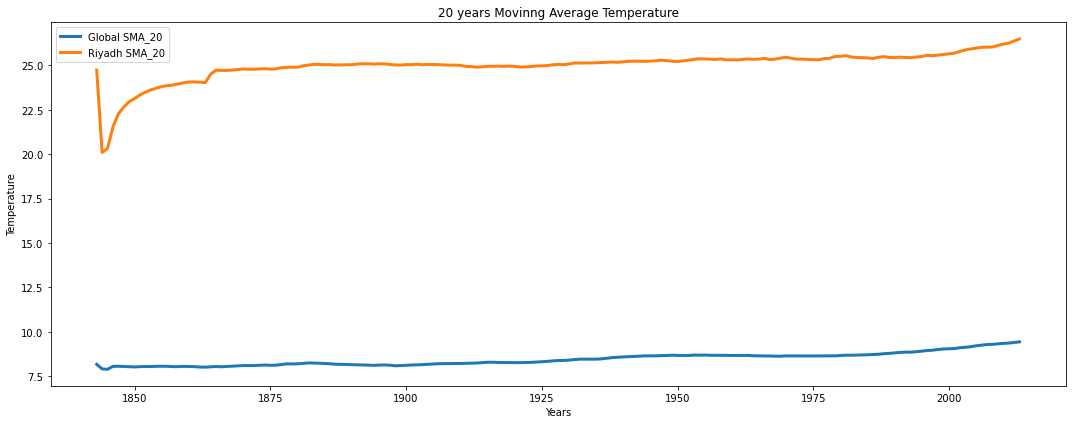

In [17]:
plt.plot(global_data.year, global_data.SMA_20, label = "Global SMA_20", linewidth=3)
plt.plot(riyadh_data.year, riyadh_data.SMA_20, label = "Riyadh SMA_20" , linewidth=3)
plt.title('20 years Movinng Average Temperature')
plt.rcParams["figure.figsize"] = (15,6)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.tight_layout()
plt.legend()
plt.show()

##  <center style="color:#b30000;"> Observation </center>

In [18]:
data = [['Global', global_data.avg_temp.min(),global_data.avg_temp.max(),global_data.avg_temp.mean()], 
        ['Riyadh', riyadh_data.avg_temp.min(),riyadh_data.avg_temp.max(),riyadh_data.avg_temp.mean()]]
df = pd.DataFrame(data, columns=['Data', 'Min_temp ($^\circ$C)', 'Max_temp ($^\circ$C)', "Mean_temp ($^\circ$C)"])
df

,Data,Min_temp ($^\circ$C),Max_temp ($^\circ$C),Mean_temp ($^\circ$C)
0,Global,7.56,9.73,8.536784
1,Riyadh,15.45,27.78,25.213977


In [19]:
# Joining the 2 tables
temp = riyadh_data.loc[:, ['year', 'avg_temp']]
temp.rename(columns={'avg_temp': 'Ravg_temp'}, inplace=True)
df2 = pd.merge(global_data.loc[:, ['year', 'avg_temp']], temp)
# calculating the average temperature difference between Riyadh and Global temperature
df2['difference'] = (df2['avg_temp'] - df2['Ravg_temp']).abs()
df2

,year,avg_temp,Ravg_temp,difference
0,1843,8.17,24.74,16.57
1,1844,7.65,15.45,7.80
2,1845,7.85,20.82,12.97
3,1846,8.55,25.20,16.65
4,1847,8.09,25.20,17.11
...,...,...,...,...
166,2009,9.51,26.71,17.20
167,2010,9.70,27.37,17.67
168,2011,9.52,26.40,16.88
169,2012,9.51,26.83,17.32


In [20]:
# The highest difference between Riyadh and Global temperature 
df2[df2['difference'] == df2['difference'].max()]

,year,avg_temp,Ravg_temp,difference
170,2013,9.61,27.78,18.17


In [21]:
# The lowest difference between Riyadh and Global temperature 
df2[df2['difference'] == df2['difference'].min()]

,year,avg_temp,Ravg_temp,difference
1,1844,7.65,15.45,7.8


 <p style="text-align-last: justify"> <h3> Based on tables and charts above: </h3> 
 
 - Comparing between Riyadh and Global average temperature show that Riyadh is way hotter than the global average. Riyadh temperature measured with minimum of 15.45 &#8451; and maximum 27.78 &#8451;, while Global temperature measured with minimum of 7.56 &#8451; and maximum 9.73 &#8451;.
 
 
 <br><br>
 
 - Riyadh average temperature showed more notable change over the years compared to the Global average temperature.
 
 <br><br>
 - The Global average temperature is consistently and slowly getting hotter (Temperature is increasing) over the years, it started with 8.17 &#8451; in 1843 and in 2013 the temperature was 9.61 &#8451;.
 
 
 <br><br>
 - Riyadh temperature over the years is slowly getting hotter and hotter (Temperature is increasing over the years) starting with 24.74 &#8451; in 1843 and 27.78 &#8451; in 2013.

<br><br>
- The highest difference between Riyadh and Global temperature in the specified time frame is 18.17 &#8451; which was measured in 2013.

<br><br>

- The lowest difference between Riyadh and Global temperature in the specified time frame is 7.8 &#8451; which was measured in 1844.  
  
 
 </p>